In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [6]:
train = pd.read_csv("train.csv", index_col=0)
train.head(3)

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [22]:
train.describe(exclude='float64')

,Brand,Material,Size,Laptop Compartment,Waterproof,Style,Color
count,290295,291653,293405,292556,292950,292030,290050
unique,5,4,3,2,2,3,6
top,Adidas,Polyester,Medium,Yes,Yes,Messenger,Pink
freq,60077,79630,101906,148342,148077,100031,51690


In [24]:
train.describe()

,Compartments,Weight Capacity (kg),Price
count,300000.000000,299862.000000,300000.000000
mean,5.443590,18.029994,81.411107
std,2.890766,6.966914,39.039340
min,1.000000,5.000000,15.000000
25%,3.000000,12.097867,47.384620
50%,5.000000,18.068614,80.956120
75%,8.000000,24.002375,115.018160
max,10.000000,30.000000,150.000000


In [31]:
train.groupby(['Laptop Compartment', 'Waterproof'])['Price'].mean().to_frame().reset_index()

,Laptop Compartment,Waterproof,Price
0,No,No,81.569353
1,No,Yes,81.476518
2,Yes,No,81.692752
3,Yes,Yes,81.405880


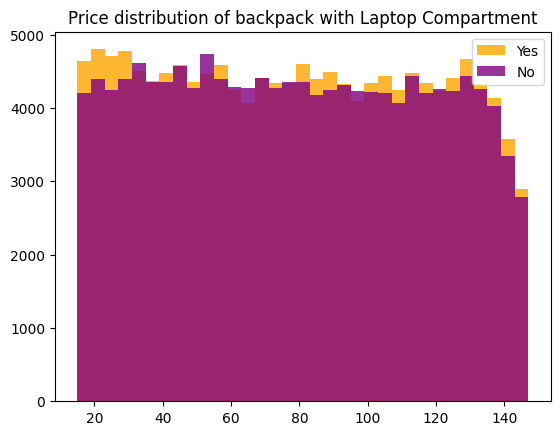

In [52]:
bins=np.arange(15, 150, 4)

plt.hist(train.loc[train['Laptop Compartment'] == 'Yes', 'Price'], color='orange', alpha=0.8, label='Yes', bins=bins)
plt.hist(train.loc[train['Laptop Compartment'] == 'No', 'Price'], color='purple', alpha=0.8, label='No', bins=bins)
plt.title('Price distribution of backpack with Laptop Compartment')
plt.legend()

plt.show()

---

In [64]:
train[train.select_dtypes(include='object').columns] = train.select_dtypes(include='object').fillna('Inconnu')
train[train.select_dtypes(include='number').columns] = train.select_dtypes(include='number').fillna(-1)
train.isna().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [75]:
gb = train.groupby(["Brand", "Material"])['Price'].mean().to_frame().sort_values(by='Price')
gb

,,Price
Brand,Material,
Inconnu,Inconnu,77.775788
Adidas,Leather,79.841314
Inconnu,Nylon,80.038115
Adidas,Nylon,80.049351
Inconnu,Leather,80.124717
Puma,Leather,80.361667
Nike,Leather,80.362421
Adidas,Inconnu,80.568979
Jansport,Leather,80.760899


Prices for both Brand and Material which are NA are pretty low.